In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.linear_model import LinearRegression


### Linear Regression
Linear regression is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price etc. Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence calles as linear regression.

Since linear regression shows the linear relationship, which measn it finds how teh value of the dependent variable is changing according to the value of teh independent variable.

In [73]:
dataset_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional' ]
df = pd.read_csv('SeoulBikeData.csv').drop(['Date','Holiday', 'Seasons'], axis= 1)

In [74]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [75]:
df.columns = dataset_cols
le = LabelEncoder()
df['functional'] = le.fit_transform(df['functional'])
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis = 1)

In [76]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


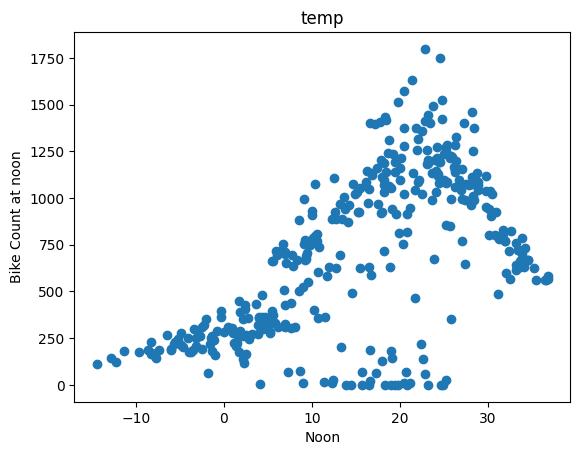

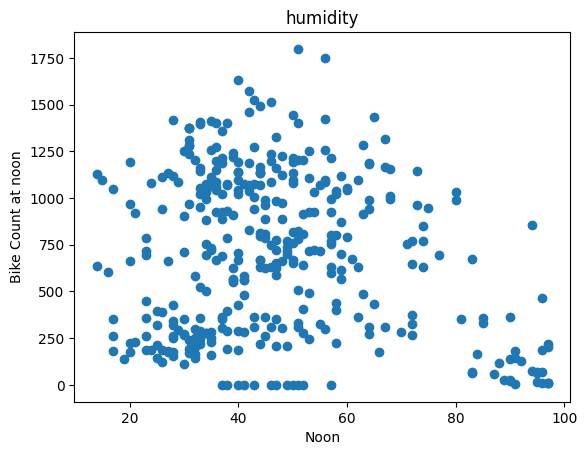

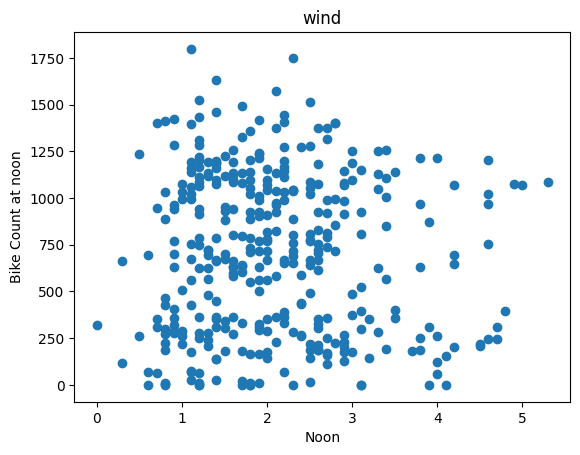

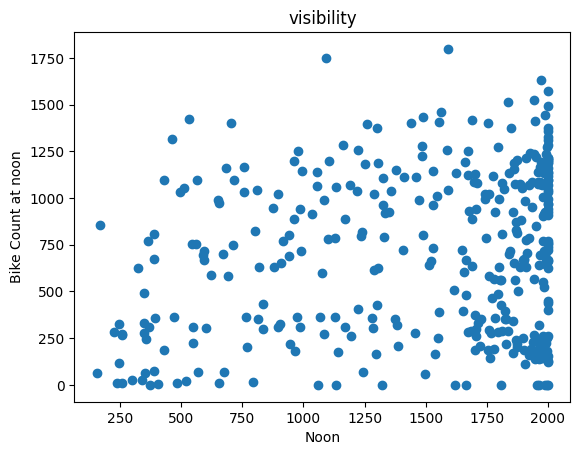

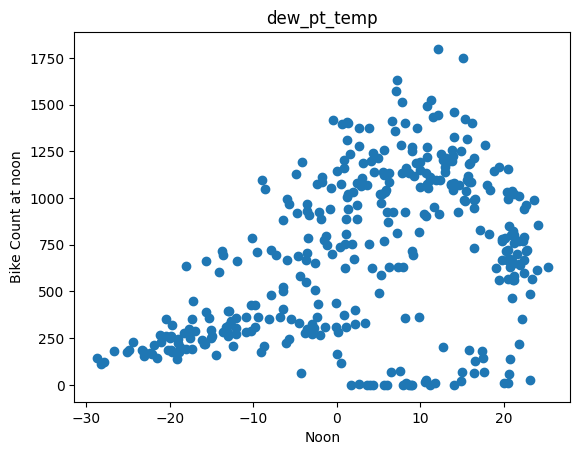

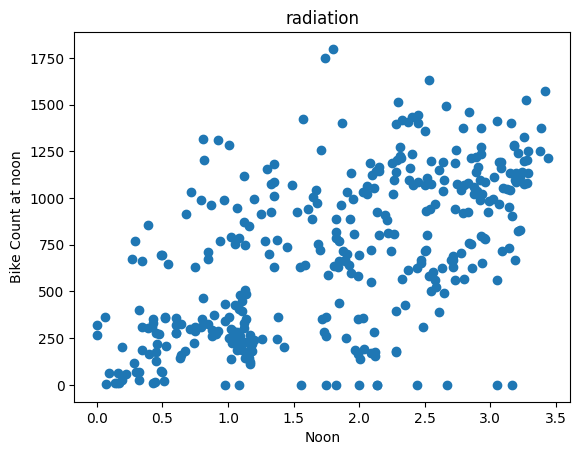

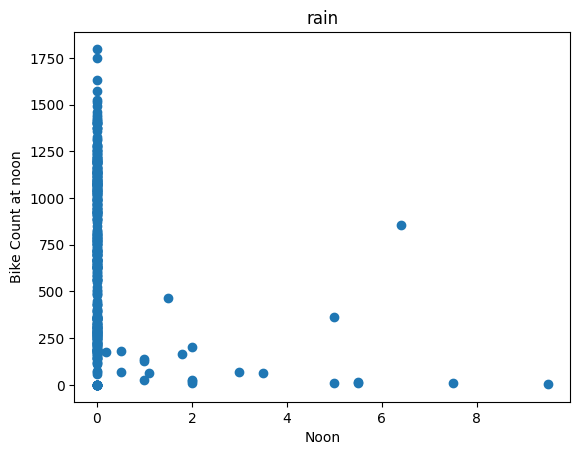

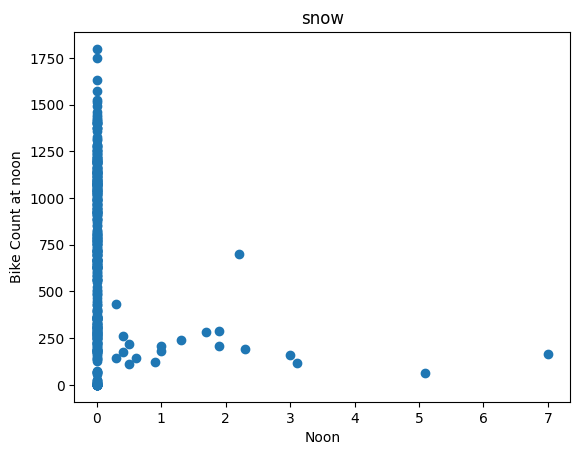

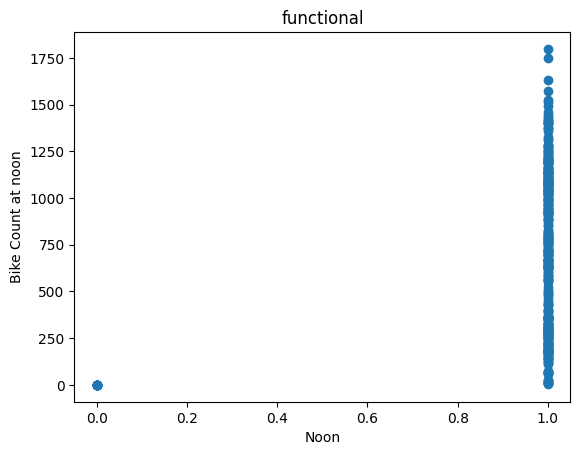

In [77]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_count'])
  plt.title(label)
  plt.ylabel('Bike Count at noon')
  plt.xlabel('Noon')
  plt.show()

In [78]:
df = df.drop(['wind', 'visibility', 'functional'], axis = 1)

In [79]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


### Train, Valid, Test Dataset


In [91]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [102]:
def get_xy(dataframe, y_label, x_labels = None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y



In [103]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, X_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_labels=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [104]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [105]:
print(temp_reg.coef_, temp_reg.intercept_)

[[18.82046017]] [397.59798773]


In [106]:
temp_reg.score(X_test_temp, y_test_temp)

0.45956135788464536

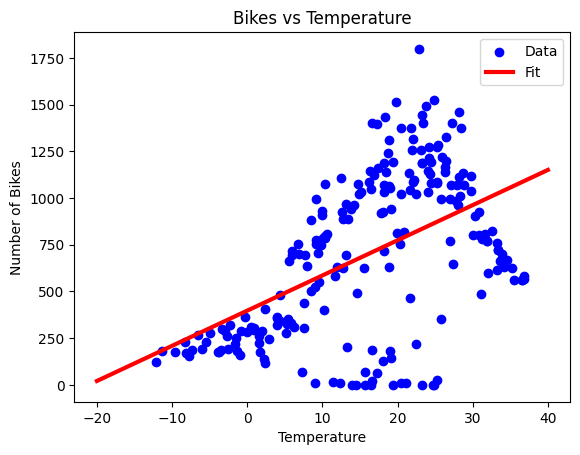

In [107]:
plt.scatter(X_train_temp, y_train_temp, label = 'Data', color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label = 'Fit', color ='red', linewidth = 3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

 ### Multiple Linear Regression

In [108]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [109]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, 'bike_count', x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df.columns[1:])

In [110]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)


LinearRegression()

In [111]:
all_reg.score(X_test_all, y_test_all)

0.46058914016755315

In [142]:
y_pred_lr = all_reg.predict(X_test_all)

## Regression WIth the Neural Networks

In [122]:
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")
  plt.legend()
  plt.grid(True)
  plt.show()

In [112]:
temp_normalizer = layers.Normalization(input_shape=(1, ), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [113]:
temp_nn_model = keras.Sequential([
    temp_normalizer,
    layers.Dense(1)
])

In [114]:
temp_nn_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01),
                      loss = 'mean_squared_error')


In [125]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    epochs = 1000,
    validation_data = (X_valid_temp, y_valid_temp),
    verbose = 0
)

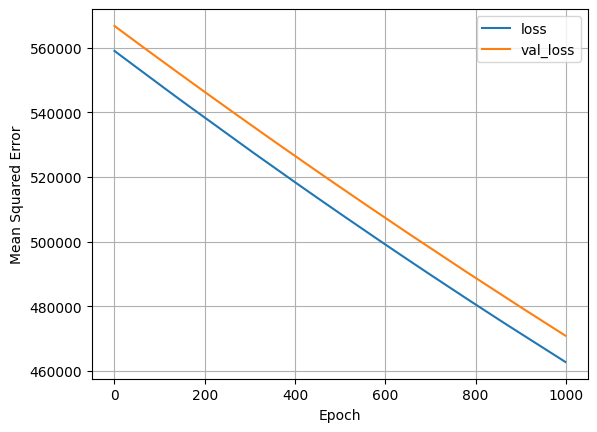

In [126]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


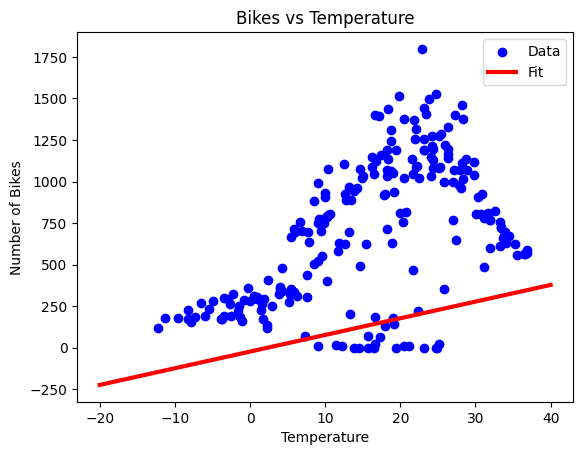

In [127]:
plt.scatter(X_train_temp, y_train_temp, label = 'Data', color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label = 'Fit', color ='red', linewidth = 3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

##Neural Net

In [133]:
nn_model = keras.Sequential([
    temp_normalizer,
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1)
])
nn_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                      loss = 'mean_squared_error')


In [134]:
history = nn_model.fit(X_train_temp, y_train_temp,
                       validation_data = (X_valid_temp, y_valid_temp),
                       verbose = 0,
                       epochs = 100)

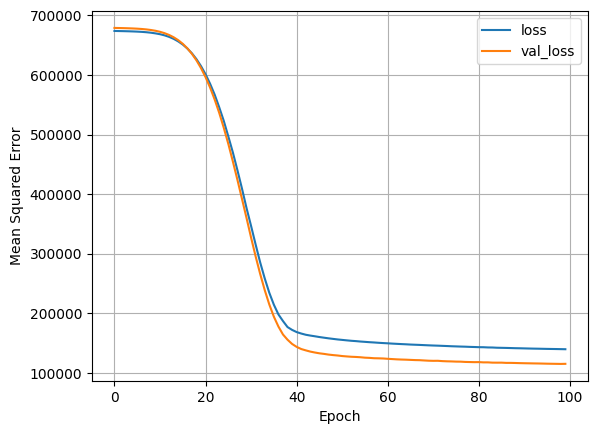

In [135]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


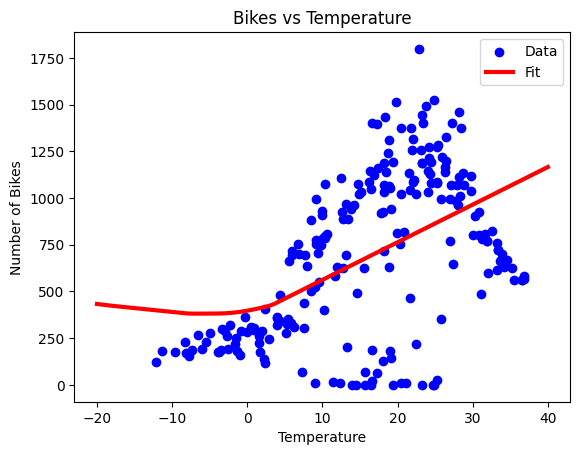

In [136]:
plt.scatter(X_train_temp, y_train_temp, label = 'Data', color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label = 'Fit', color ='red', linewidth = 3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

In [148]:
all_normalizer = layers.Normalization(input_shape=(6,), axis = -1)
all_normalizer.adapt(X_train_all)

all_nn_model = keras.Sequential([
    all_normalizer,
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),

    layers.Dense(1)
])
all_nn_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                      loss = 'mean_squared_error')

In [149]:
history = all_nn_model.fit(X_train_all, y_train_all,
                       validation_data = (X_valid_all, y_valid_all),
                       verbose = 0,
                       epochs = 100)

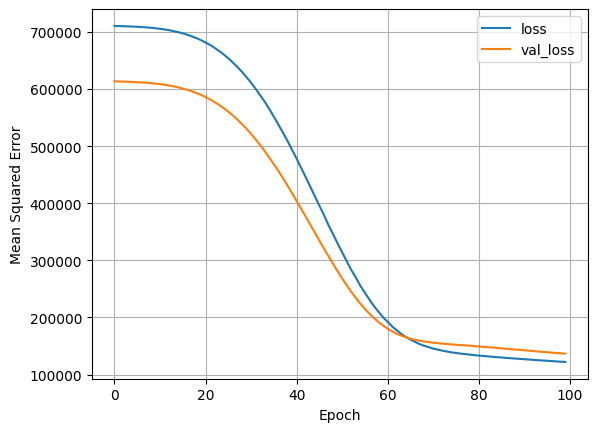

In [150]:
plot_loss(history)

In [151]:
# Calculate teh mean squared error for both linear regressor adn neural net

y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = all_nn_model.predict(X_test_all)

3/3 [==============================] - 0s 2ms/step


In [152]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [153]:
MSE(y_pred_lr, y_test_all)

98080.24783940805

In [154]:
MSE(y_pred_nn, y_test_all)

126730.73857497505

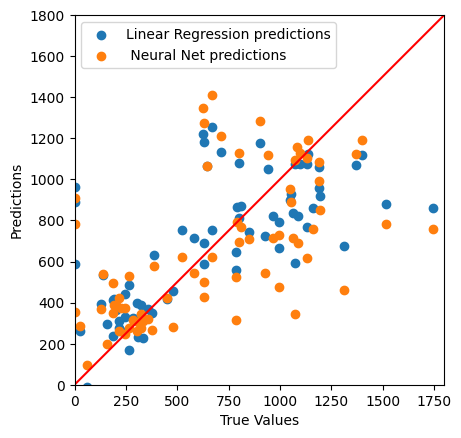

In [159]:
ax = plt.axes(aspect = 'equal')
plt.scatter(y_test_all, y_pred_lr, label = 'Linear Regression predictions')
plt.scatter(y_test_all, y_pred_nn, label = ' Neural Net predictions')
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_  = plt.plot(lims, lims, c ='red')